# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve,scorer,f1_score,precision_score,recall_score
from lightgbm import LGBMClassifier

import _pickle as pickle

from yellowbrick.classifier import DiscriminationThreshold
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import itertools

from sklearn.model_selection import cross_val_score, StratifiedKFold

from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from hyperopt import  fmin, hp, tpe, Trials, STATUS_OK

from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
import matplotlib.pyplot as plt
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Import DataSet for Modelling Preparation 

In [2]:
#path to training dataset
path_to_percustomer_orders_records='./input_data/peruser_order_attributes.csv'



In [3]:
#load the dataset
df_peruser_orderdata=pd.read_csv(path_to_percustomer_orders_records)
df_peruser_orderdata.head()

customer_id  num_restaurant_id_unique  num_city_id_unique  \
0  000097eabfd9                         1                   1   
1  0000e2c6d9be                         1                   1   
2  000133bb597f                         1                   1   
3  00018269939b                         1                   1   
4  0001a00468a6                         1                   1   

   num_platform_id_unique  num_payment_id_unique  num_transmission_id_unique  \
0                       1                      1                           1   
1                       1                      1                           1   
2                       1                      1                           1   
3                       1                      1                           1   
4                       1                      1                           1   

   amount_paid_mean  amount_paid_std  amount_paid_sum  amount_paid_q25  ...  \
0          11.46960              0.0         11.46960         11.46960  ...   
1           9.55800              0.0          9.55800          9.55800  ...   
2           5.93658              0.0          5.93658          5.93658  ...   
3           9.82350              0.0          9.82350          9.82350  ...   
4           5.15070              0.0          5.15070          5.15070  ...   

   platform_id_29751  platform_id_29815  platform_id_30135  platform_id_30199  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   platform_id_30231  platform_id_30359  platform_id_30391  platform_id_30423  \
0              100.0                0.0                0.0                0.0   
1                0.0              100.0                0.0                0.0   
2                0.0              100.0                0.0                0.0   
3                0.0              100.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   platform_id_525  is_returning_customer  
0              0.0                      0  
1              0.0                      0  
2              0.0                      1  
3              0.0                      0  
4              0.0                      0  

[5 rows x 55 columns]

In [4]:
df_peruser_orderdata.shape

(245455, 55)

In [5]:
#Distribution of target variable for binary classification

df_peruser_orderdata['is_returning_customer'].value_counts(normalize=True)*100

0    77.386079
1    22.613921
Name: is_returning_customer, dtype: float64

Scaling the numerical values as part of modelling process to converge faster and better

In [6]:

X = df_peruser_orderdata.iloc[:, 1:-1]
y = df_peruser_orderdata.iloc[:, -1]

In [7]:
X.shape

(245455, 53)

In [8]:
y.shape

(245455,)

In [9]:
#Normalize the values
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)


In [10]:
#Combine the scaled attributes together for training dataset

In [11]:

data_totrain = pd.concat([X_scaled, y], axis=1)

data_totrain.head()

num_restaurant_id_unique  num_city_id_unique  num_platform_id_unique  \
0                 -0.412621           -0.170542               -0.407176   
1                 -0.412621           -0.170542               -0.407176   
2                 -0.412621           -0.170542               -0.407176   
3                 -0.412621           -0.170542               -0.407176   
4                 -0.412621           -0.170542               -0.407176   

   num_payment_id_unique  num_transmission_id_unique  amount_paid_mean  \
0                -0.3857                   -0.515242          0.114169   
1                -0.3857                   -0.515242         -0.215448   
2                -0.3857                   -0.515242         -0.839890   
3                -0.3857                   -0.515242         -0.169668   
4                -0.3857                   -0.515242         -0.975399   

   amount_paid_std  amount_paid_sum  amount_paid_q25  amount_paid_q75  ...  \
0        -0.443169        -0.302429         0.225501         0.027660  ...   
1        -0.443169        -0.329776        -0.114549        -0.280731  ...   
2        -0.443169        -0.381583        -0.758754        -0.864961  ...   
3        -0.443169        -0.325977        -0.067320        -0.237899  ...   
4        -0.443169        -0.392825        -0.898552        -0.991744  ...   

   platform_id_29751  platform_id_29815  platform_id_30135  platform_id_30199  \
0          -0.142488          -0.475286           -0.02136          -0.052164   
1          -0.142488          -0.475286           -0.02136          -0.052164   
2          -0.142488          -0.475286           -0.02136          -0.052164   
3          -0.142488          -0.475286           -0.02136          -0.052164   
4          -0.142488          -0.475286           -0.02136          -0.052164   

   platform_id_30231  platform_id_30359  platform_id_30391  platform_id_30423  \
0           2.063434          -0.492021          -0.238225          -0.133524   
1          -0.525142           2.274581          -0.238225          -0.133524   
2          -0.525142           2.274581          -0.238225          -0.133524   
3          -0.525142           2.274581          -0.238225          -0.133524   
4          -0.525142          -0.492021          -0.238225          -0.133524   

   platform_id_525  is_returning_customer  
0        -0.055904                      0  
1        -0.055904                      0  
2        -0.055904                      1  
3        -0.055904                      0  
4        -0.055904                      0  

[5 rows x 54 columns]

#Split the dataset to train and test using stratify so that we maintain the balance of class distribution in train and test sets.



In [12]:
X = data_totrain.iloc[:, 1:-1]
y = data_totrain.iloc[:, -1]
# Compute train,test matrices with 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,shuffle=True, random_state=130) 



Checking the distribution of records with respect to labelled data.if the splits are balanced or not

In [13]:

y_train.mean(), y_test.mean(), len(y_train), len(y_test)

(0.2261381599317729, 0.2261423636008083, 184091, 61364)

Since its a binary classfication problem with class imbalances the following evaluation metrics should be considered while comparision
- F1 Score
- Roc_AUC
- Precision/Recall
- Accuracy
- Cohen Kappa score



# Model Buidling Phase


In [21]:
cols=X.columns
#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 

#threshold_plot - if True returns threshold plot for model
    
def to_train(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)[:, 1]
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n")
    print(classification_report(testing_y,predictions))
    print('-----------------------')
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    print('-----------------------')
    print("F1 score:",f1_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(list(testing_y),probabilities) 
    print('-----------------------')
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    df_feature_imp=coef_sumry[['features','coefficients']]
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
    return df_feature_imp        





# 1.Logistic Regression with Default Model Paramters

In [22]:
logit  = LogisticRegression()


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     47487
           1       0.72      0.35      0.47     13877

    accuracy                           0.82     61364
   macro avg       0.78      0.65      0.68     61364
weighted avg       0.81      0.82      0.80     61364

-----------------------
Accuracy   Score :  0.8227462355778632
-----------------------
F1 score: 0.4708343468742399
-----------------------
Area under curve :  0.8057051395347503 



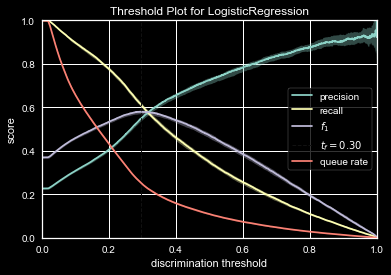

In [52]:

df_featureimp=to_train(logit,X_train,X_test,y_train,y_test,cols,"coefficients",threshold_plot = True)



# 2.Random Forest with Default estimators

In [25]:
rf_c = RandomForestClassifier(random_state = 30)
rf_c.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [26]:
def compute_metrics(rf_c,X_test,y_test):
    predictions   = rf_c.predict(X_test)
    probabilities = rf_c.predict_proba(X_test)[:,1]
    print('Accuracy score is',accuracy_score(y_test,predictions))
    print('Roc_AUC Curve score is',roc_auc_score(list(y_test),probabilities))
    print('F1 score is',f1_score(y_test, predictions))
    

In [27]:
compute_metrics(rf_c,X_test,y_test)

Accuracy score is 0.8318069226256437
Roc_AUC Curve score is 0.7957093521090631
F1 score is 0.5441053050046379


# 3.Light GBM Classifier 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     47487
           1       0.75      0.44      0.55     13877

    accuracy                           0.84     61364
   macro avg       0.80      0.70      0.73     61364
weighted avg       0.83      0.84      0.82     61364

-----------------------
Accuracy   Score :  0.8397594680920409
-----------------------
F1 score: 0.5534311276624733
-----------------------
Area under curve :  0.8201319542365463 



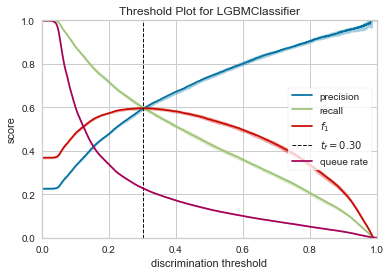

In [28]:
##light gbm classifier is one of the boosting algorithm generally known for faster computation and also good at reducing variance and bias.

lgbm_c=LGBMClassifier()

df_featureimp=to_train(lgbm_c,X_train,X_test,y_train,y_test,cols,"features",threshold_plot = True)

# 4.Xgboost Classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Classification report : 

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     47487
           1       0.74      0.44      0.55     13877

    accuracy                           0.84     61364
   macro avg       0.80      0.70      0.73     61364
weighted avg       0.83      0.84      0.82     61364

--------------------

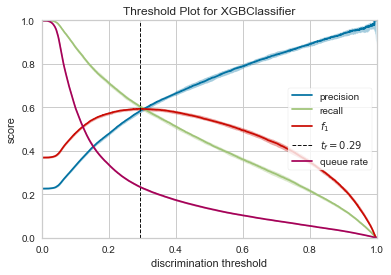

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
df_featureimp=to_train(xgb,X_train,X_test,y_train,y_test,cols,"features",threshold_plot = True)


# Keytakeaways:

Out of all above 4 models starting from Logisticregression to XGB,we see that lightgbm outperforms other models interms of Accuracy , F-1score , Auc-auc metrics.
its also faster in terms of computation.


In case of Lightgbm model, we see topfeatures which are important as part of model are
- num_days_before_lastdate
- avg-recency_days-orders
- total_success_orders
- amount_paid_sum
- amount_paid_mean
- voucher_paid_mean
- diff_days_in_first_last_order
- deliveryfee_sum

Lets compare Roc_AUC curve across models

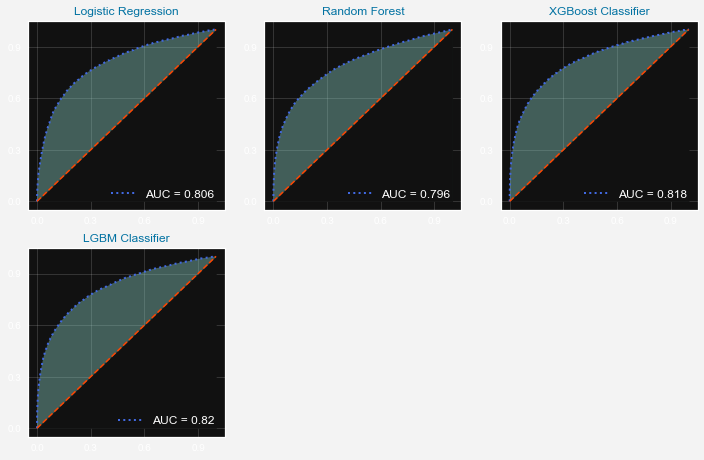

In [34]:
lst    = [logit,rf_c,xgb,lgbm_c]

length = len(lst)

mods   = ['Logistic Regression','Random Forest',
           'XGBoost Classifier','LGBM Classifier']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(list(y_test),probabilities[:,1]),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

# Precision-Recall curves for models

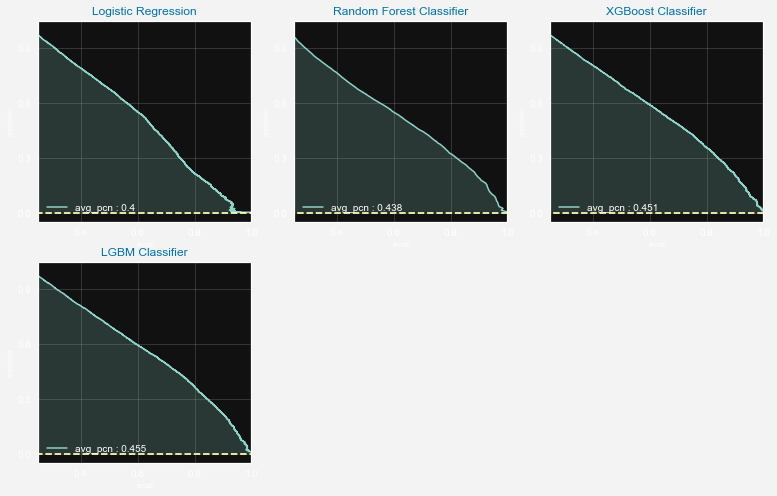

In [31]:



lst    = [logit,rf_c,xgb,lgbm_c]

length = len(lst)

mods   = ['Logistic Regression','Random Forest Classifier',
           'XGBoost Classifier','LGBM Classifier']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))
    

# HyperParamter Tuning of LGBM

- As we have seen in all above models, lightgbm seems to be promising with default parameters so lets tune some of the hyperparameters for improving the model

- Though we have many techniques for hyperparamter tuning like Gridsearch,Randomsearch,Bayesiansearch etc. I would like to use hyperopt library with few parameters to try out as it would take lot of time to precisely adjust the paramters and to convere etc.
I would keep all the other techniques and extra paramteres to tune for future imporvements considering the time constraints etc.



In [35]:
# Setting a 5-fold stratified cross-validation 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

In [36]:
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = LGBMClassifier(
        
        learning_rate=0.01,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=StratifiedKFold()).mean()
    print("ROC_auc {:.3f} params {}".format(score, params))
    loss = 1 - score # the idea is to penalise the loss
    return {'loss': loss, 'status' : STATUS_OK}
    
#search space of params
space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'n_estimators': hp.quniform('n_estimators', 50, 600, 20)
    
}


best = fmin(fn=objective,space=space,algo=tpe.suggest,max_evals=10) #max_evals is kept at 10 just to be quicker to computer

ROC_auc 0.818 params {'n_estimators': 520, 'num_leaves': 78, 'colsample_bytree': '0.757'}
ROC_auc 0.817 params {'n_estimators': 180, 'num_leaves': 58, 'colsample_bytree': '0.643'}
ROC_auc 0.817 params {'n_estimators': 220, 'num_leaves': 56, 'colsample_bytree': '0.860'}
ROC_auc 0.817 params {'n_estimators': 320, 'num_leaves': 102, 'colsample_bytree': '0.680'}
ROC_auc 0.817 params {'n_estimators': 420, 'num_leaves': 118, 'colsample_bytree': '0.924'}
ROC_auc 0.817 params {'n_estimators': 180, 'num_leaves': 100, 'colsample_bytree': '0.986'}
ROC_auc 0.817 params {'n_estimators': 420, 'num_leaves': 96, 'colsample_bytree': '0.903'}
ROC_auc 0.817 params {'n_estimators': 420, 'num_leaves': 96, 'colsample_bytree': '0.821'}
ROC_auc 0.818 params {'n_estimators': 520, 'num_leaves': 112, 'colsample_bytree': '0.450'}
ROC_auc 0.816 params {'n_estimators': 200, 'num_leaves': 26, 'colsample_bytree': '0.713'}
100%|██████████| 10/10 [07:54<00:00, 47.49s/trial, best loss: 0.18244092551482893]


In [37]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'colsample_bytree': 0.7570273275392536, 'n_estimators': 520.0, 'num_leaves': 78.0}


Fit the hyperparamter tuned model and see how good it is incomparision with other model metrics

In [38]:
lgbm_model = LGBMClassifier(
    n_estimators=520,
    learning_rate=0.01,
    num_leaves=78,
    colsample_bytree= 0.7570273275392536
)
lgbm_model.fit(X_train,y_train)
compute_metrics(lgbm_model,X_test,y_test)

Accuracy score is 0.8396616908936836
Roc_AUC Curve score is 0.8204267914930986
F1 score is 0.5530774471950943


#It seems that provided parameters isnt enough..need to evaluate more and would take lot of cpu time time as well.For the moment I would goahead with the default lightgbm model for final evaluation .



# Aggregate all the model metrics for an overview

- Kappa score is an important measure on classifier performance, especially on imbalanced data sets.
    
- The Kappa statistic (or value) is a metric that compares an Observed Accuracy with an Expected Accuracy (random chance). The kappa statistic is used not only to evaluate a single classifier, but also to evaluate classifiers amongst themselves

Kappa score:

- <0 as indicating no agreement
- 0.00–0.20 as slight, 
- 0.21–0.40 as fair, 
- 0.41–0.60 as moderate, 
- 0.61–0.80 as substantial,
 
- 0.81–1 as almost perfect agreement

In [42]:

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(X_test)
    probabilities= model.predict_proba(X_test)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(list(testing_y),probabilities[:,1])
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit,X_train,X_test,y_train,y_test,
                      "Logistic Regression")

model2 = model_report(rf_c,X_train,X_test,y_train,y_test,
                      "Random Forest")
model3 = model_report(lgbm_c,X_train,X_test,y_train,y_test,
                      "LGBM")

model4 = model_report(xgb,X_train,X_test,y_train,y_test,
                      "XGBoost Classifier")

model5 = model_report(lgbm_model,X_train,X_test,y_train,y_test,
                      "LGBM Tuned")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

In [53]:
model_performances

Model  Accuracy_score  Recall_score  Precision  f1_score  \
0  Logistic Regression        0.822746      0.348706   0.724618  0.470834   
1        Random Forest        0.831807      0.443828   0.702922  0.544105   
2                 LGBM        0.839759      0.439072   0.748342  0.553431   
3   XGBoost Classifier        0.838065      0.438567   0.739310  0.550545   
4           LGBM Tuned        0.839662      0.438712   0.748095  0.553077   

   Area_under_curve  Kappa_metric  
0          0.805705      0.379685  
1          0.795709      0.447368  
2          0.820132      0.463747  
3          0.817690      0.459528  
4          0.820427      0.463356

# Keytakeaway:

From the above tables, we can clearly see that LGBM(Default Parameters) Classifier is better compared to rest all models
with Higher Accuracy,Higher Roc_AUC score and Higher F1_score.
It also shows that LGBM kappa metric is above 0.4 which means the model is moderate enough.
The more the time spend of hyperparamter tuning etc and feature engineering could improve these scores further.


LGBM offer higher recall score compared to others and this is one of the important quality in case of churn prediction
Logistic regression recall_score  is lower in identifying the returning customers out of total returning customers.it doesnt perform well.


Lets check for cross-validation scores on the finalised model with StratifiedKfold

In [43]:

accuracy_scores_cv = cross_val_score(lgbm_c, X_train, y_train, cv=skf, scoring = 'accuracy')
accuracy_scores_cv

array([0.83698634, 0.83559672, 0.83548808, 0.83855723, 0.83942637])

In [44]:
accuracy_scores_cv.mean()

0.8372109458072758

In [45]:

f1_scores_cv = cross_val_score(lgbm_c, X_train, y_train, cv=skf, scoring = 'f1')
f1_scores_cv

array([0.54592223, 0.54056926, 0.53851429, 0.54908208, 0.55089638])

In [46]:
f1_scores_cv.mean()

0.5449968477292867

- Since there is a slight varation in terms of training data metrics (Accuracy&F1) scores with cross validation.It seems to be fine

Out of interest wanted to see how learning curve behaves

In [47]:
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize = (16, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=StratifiedKFold(n_splits=5), n_jobs=n_jobs, train_sizes=train_sizes,scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    
   
    return plt


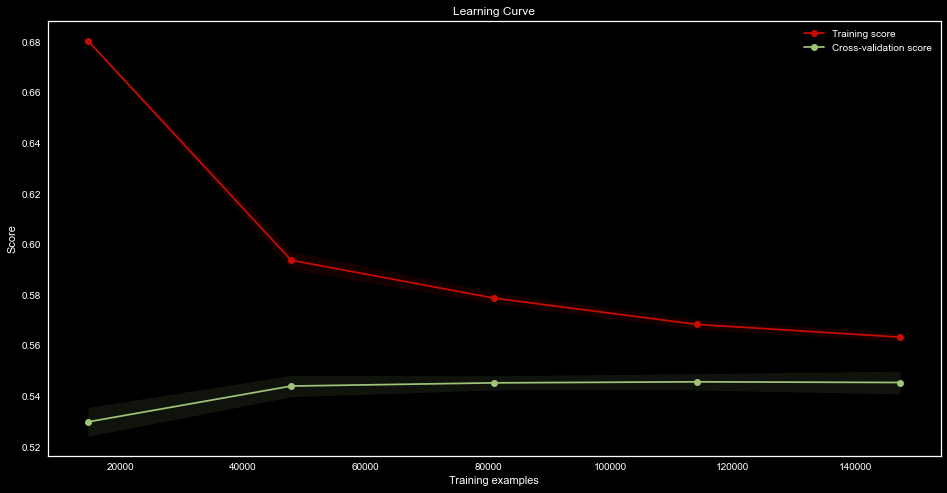

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [48]:

plot_learning_curve(lgbm_c, 'Learning Curve', X_train, y_train, cv=StratifiedKFold(n_splits=5))

- It shows as the size of training and test dataset increases,how the learning curve behaves and how metrics drop accordingly .

# Finally Save the model

In [49]:

model_name='lgb_classifier_default'
pickle.dump(lgbm_c,open(model_name,'wb'))

# Areas of Improvements

- 1.Hyperparamter Tuning using Gridsearch/RandomsearchCV and other  tuning techniques to be implemented
- 2.Using H2oAutoML for modelling .as it does stacking and ensemble of multiple models together for better accuracy and its proven in many cases
- 3.Customer segmentation((new or existing users)/ (spenders vs non-spenders) by considering there tenure in the platform(how long they have been using and registration info,demographics info etc) could augment data and improve modelling.As we have seen the (number_of_daysbefore_lastdate) and diff_days_between_first_last_order features capture some of this essence.

- 4.Deep learning like sequence modelling(RNN) could be used be tried
- 5.Rating or Estimated_delivery_time etc attributes could also add value to add to understand customers sentiment towards orders.
- 6.As part of feature engineering ,some complex Feature transformations could be used like log,exponential for numerical values especially (amount_paid_sum,delivery_fee_sum etc).

- 7.Sometimes the failed ones are happening immediately before the successful one.Further analysis is needed whether to retain this info or exclude etc.it could also happen because of restaurants platform issues.
- 8.Handling missing data with Smote and other data imputation techniques..we can also try to use imblearn for handling class imbalances .
- Recursive Feature elimination and other feature selection techniques can be tried for reducing the feature space etc.




